# Correlation and Regression

### Course Description
Ultimately, data analysis is about understanding relationships among variables. Exploring data with multiple variables requires new, more complex tools, but enables a richer set of comparisons. In this course, you will learn how to describe relationships between two numerical quantities. You will characterize these relationships graphically, in the form of summary statistics, and through simple linear regression models.

### Note how can Resizing plots in the R kernel for Jupyter notebooks
https://blog.revolutionanalytics.com/2015/09/resizing-plots-in-the-r-kernel-for-jupyter-notebooks.html

    library(repr)

    # Change plot size to 4 x 3
    options(repr.plot.width=4, repr.plot.height=3)
    
### Note2 Generate a table 
https://www.tablesgenerator.com/markdown_tables

### Note 3 - DataFrames

In [1]:
library(dplyr)
library(ggplot2)
library(readr)
library(tidyr)
library(datasets)
library(broom)

library(openintro)
data(ncbirths)
data(mammals)
data(mlbBat10)
data(bdims)
data(smoking)
data(anscombe)
data(textbooks)

library(tidyr)
library(dplyr)
Anscombe<-anscombe
Anscombe<-mutate(Anscombe, id = 1:nrow(Anscombe))
Anscombe<-gather(Anscombe,variable, valor, -id) 
#y<- select(filter(Anscombe, variable %in% c("y1","y2","y3","y4")), valor) 
y<-filter(Anscombe, variable %in% c("y1","y2","y3","y4")) %>% .$valor
Anscombe<-filter(Anscombe, variable %in% c("x1","x2","x3","x4"))
Anscombe<-mutate(Anscombe, new = y)
names(Anscombe)<-c("id","set","x","y")


Warning message:
"package 'dplyr' was built under R version 3.5.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'ggplot2' was built under R version 3.5.3"Warning message:
"package 'readr' was built under R version 3.5.3"Warning message:
"package 'broom' was built under R version 3.5.3"Warning message:
"package 'openintro' was built under R version 3.5.2"Please visit openintro.org for free statistics materials

Attaching package: 'openintro'

The following object is masked from 'package:ggplot2':

    diamonds

The following objects are masked from 'package:datasets':

    cars, trees



## 1) Visualizing two variables
In this chapter, you will learn techniques for exploring bivariate relationships.

### 1.1) (video) Visualizing bivariate relationships


#### 1.1.1) Scatterplots
Scatterplots are the most common and effective tools for visualizing the relationship between two numeric variables.

The `ncbirths` dataset is a random sample of 1,000 cases taken from a larger dataset collected in 2004. Each case describes the birth of a single child born in North Carolina, along with various characteristics of the child (e.g. birth weight, length of gestation, etc.), the child's mother (e.g. age, weight gained during pregnancy, smoking habits, etc.) and the child's father (e.g. age). You can view the help file for these data by running `?ncbirths` in the console.

**Exercise**
Using the ncbirths dataset, make a scatterplot using ggplot() to illustrate how the birth weight of these babies varies according to the number of weeks of gestation.

*Answer*

Warning message:
"Removed 2 rows containing missing values (geom_point)."

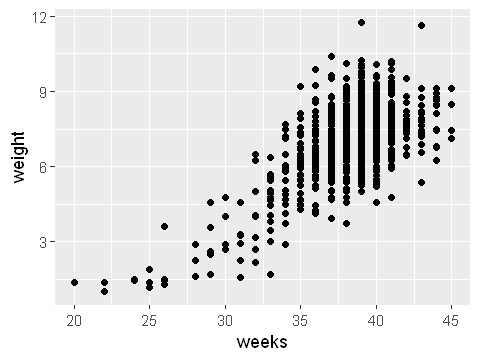

In [2]:
library(repr)
# Change plot size to 4 x 3
    options(repr.plot.width=4, repr.plot.height=3)

# Scatterplot of weight vs. weeks
ggplot(ncbirths, aes(y = weight, x = weeks)) + geom_point()

#### 1.1.2) Boxplots as discretized/conditioned scatterplots
If it is helpful, you can think of boxplots as scatterplots for which the variable on the x-axis has been discretized.

The `cut()` function takes two arguments: the continuous variable you want to discretize and the number of `breaks` that you want to make in that continuous variable in order to discretize it.

**Exercise**
Using the `ncbirths` dataset again, make a boxplot illustrating how the birth weight of these babies varies according to the number of weeks of gestation. This time, use the cut() function to discretize the x-variable into six intervals (i.e. five breaks).

*Answer*

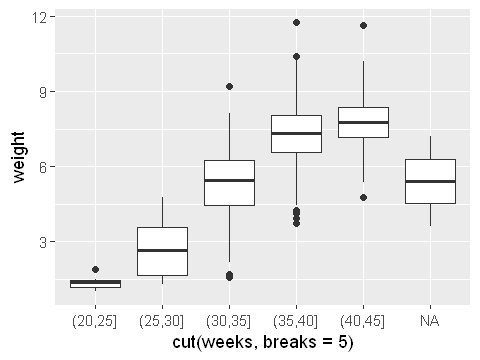

In [3]:
library(repr)
# Change plot size to 4 x 3
    options(repr.plot.width=4, repr.plot.height=3)

# Boxplot of weight vs. weeks
ggplot(data = ncbirths, 
       aes(x = cut(weeks, breaks = 5), y = weight)) +  geom_boxplot()

### 1.2) (video) Characterizing bivariate relationships
scatter plot can reveal patterns and deviation of these patterns, this plot can give us some insights into the natural phenomenon, specifically we are looking 4 things: form, direction,strength, outliers:

Form is overall shape makes by the points (linear or non-linear)
Direction (eg. positve or negative)
Strength (how much scatter/noise?)
Outliers

#### 1.2.1) Creating scatterplots
Creating scatterplots is simple and they are so useful that is it worthwhile to expose yourself to many examples. Over time, you will gain familiarity with the types of patterns that you see. You will begin to recognize how scatterplots can reveal the nature of the relationship between two variables.

In this exercise, and throughout this chapter, we will be using several datasets listed below. These data are available through the `openintro` package. Briefly:

1. The `mammals` dataset contains information about 39 different species of mammals, including their body weight, brain weight, gestation time, and a few other variables.
2. The `mlbBat10` dataset contains batting statistics for 1,199 Major League Baseball players during the 2010 season.
3. The `bdims` dataset contains body girth and skeletal diameter measurements for 507 physically active individuals.
4. The `smoking` dataset contains information on the smoking habits of 1,691 citizens of the United Kingdom.

To see more thorough documentation, use the ? or help() functions.

**Exercise**
1. Using the mammals dataset, create a scatterplot illustrating how the brain weight of a mammal varies as a function of its body weight.
2. Using the mlbBat10 dataset, create a scatterplot illustrating how the slugging percentage (SLG) of a player varies as a function of his on-base percentage (OBP).
3. Using the bdims dataset, create a scatterplot illustrating how a person's weight varies as a function of their height. Use color to separate by sex, which you'll need to coerce to a factor with factor().
4. Using the smoking dataset, create a scatterplot illustrating how the amount that a person smokes on weekdays varies as a function of their age.

*Answer*

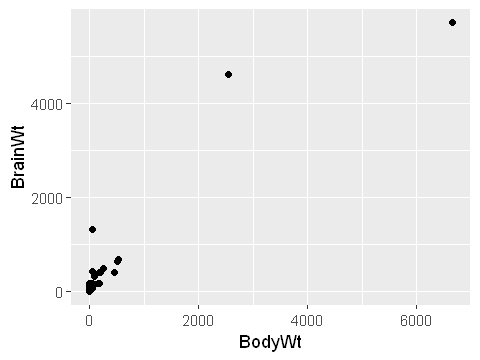

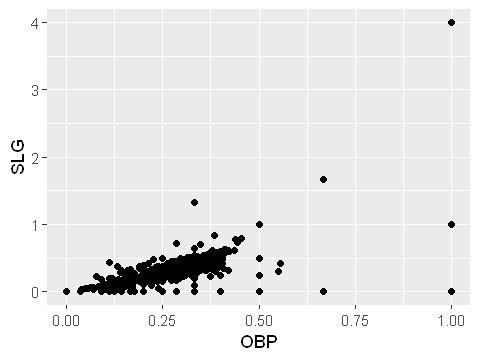

Warning message:
"Removed 1270 rows containing missing values (geom_point)."

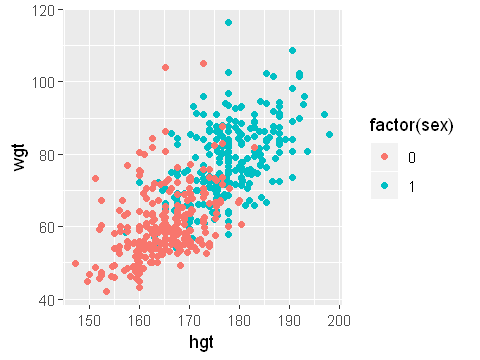

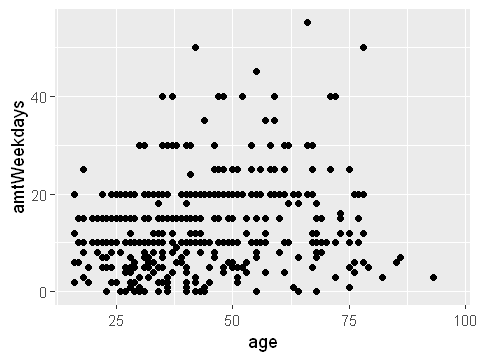

In [4]:
library(repr)
# Change plot size to 4 x 3
    options(repr.plot.width=4, repr.plot.height=3)

# Mammals scatterplot
ggplot(mammals, aes(x = BodyWt, y = BrainWt)) + geom_point()

# Baseball player scatterplot
ggplot(mlbBat10, aes(x = OBP, y = SLG)) + geom_point()

# Body dimensions scatterplot
ggplot(data = bdims, aes(x = hgt, y = wgt, color = factor(sex))) +
  geom_point()

# Smoking scatterplot
ggplot(smoking, aes(x = age, y = amtWeekdays)) + geom_point()


####  1.2.2) Transformations
The relationship between two variables may not be linear. In these cases we can sometimes see strange and even inscrutable patterns in a scatterplot of the data. Sometimes there really is no meaningful relationship between the two variables. Other times, a careful transformation of one or both of the variables can reveal a clear relationship.

Recall the bizarre pattern that you saw in the scatterplot between brain weight and body weight among mammals in a previous exercise. Can we use transformations to clarify this relationship?

`ggplot2` provides several different mechanisms for viewing transformed relationships. The `coord_trans()` function transforms the coordinates of the plot. Alternatively, the `scale_x_log10()` and `scale_y_log10()` functions perform a base-10 log transformation of each axis. Note the differences in the appearance of the axes.

The mammals dataset is available in your workspace.

**Exercise**
1. Use coord_trans() to create a scatterplot showing how a mammal's brain weight varies as a function of its body weight, where both the x and y axes are on a "log10" scale.
2. Use scale_x_log10() and scale_y_log10() to achieve the same effect but with different axis labels and grid lines.

*Answer*

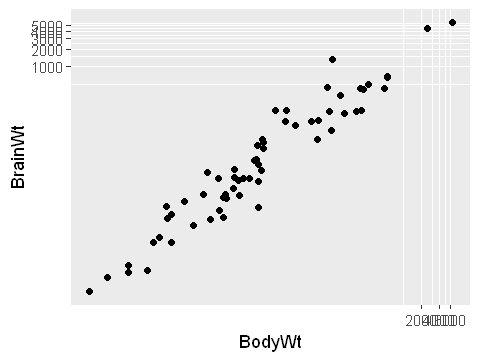

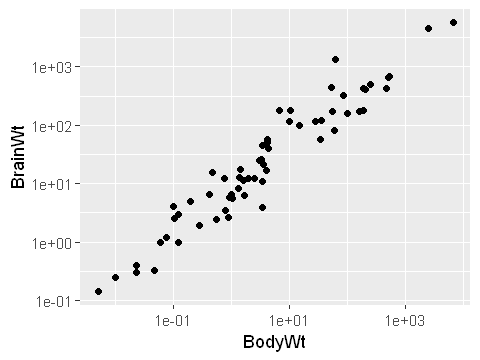

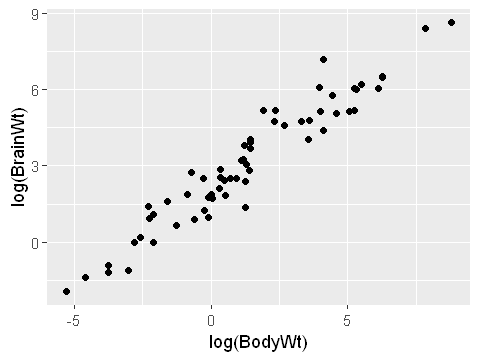

In [5]:
library(repr)
# Change plot size to 4 x 3
    options(repr.plot.width=4, repr.plot.height=3)

# Scatterplot with coord_trans()
ggplot(mammals, aes(x = BodyWt, y = BrainWt)) +
  geom_point() + 
  coord_trans(x = "log10", y = "log10")

# Scatterplot with scale_x_log10() and scale_y_log10()
ggplot(data = mammals, aes(x = BodyWt, y = BrainWt)) +
  geom_point() +
  scale_x_log10() + 
  scale_y_log10()

# log over the data (it´s my idea)
ggplot(data = mammals, aes(x = log(BodyWt), y = log(BrainWt))) +
  geom_point()


### 1.3) (video) Outliers

#### 1.3.1) Identifying outliers
In Chapter 5, we will discuss how outliers can affect the results of a linear regression model and how we can deal with them. For now, it is enough to simply identify them and note how the relationship between two variables may change as a result of removing outliers.

Recall that in the baseball example earlier in the chapter, most of the points were clustered in the lower left corner of the plot, making it difficult to see the general pattern of the majority of the data. This difficulty was caused by a few outlying players whose on-base percentages (OBPs) were exceptionally high. These values are present in our dataset only because these players had very few batting opportunities.

Both OBP and SLG are known as rate statistics, since they measure the frequency of certain events (as opposed to their count). In order to compare these rates sensibly, it makes sense to include only players with a reasonable number of opportunities, so that these observed rates have the chance to approach their long-run frequencies.

In Major League Baseball, batters qualify for the batting title only if they have 3.1 plate appearances per game. This translates into roughly 502 plate appearances in a 162-game season. The `mlbBat10` dataset does not include plate appearances as a variable, but we can use at-bats (`AB`) -- which constitute a subset of plate appearances -- as a proxy.

**Exercise**
1. Use filter() to keep only players who had at least 200 at-bats, assigning to ab_gt_200.
2. Using ab_gt_200, create a scatterplot for SLG as a function of OBP.
3. Find the row of ab_gt_200 corresponding to the one player (with at least 200 at-bats) whose OBP was below 0.200.

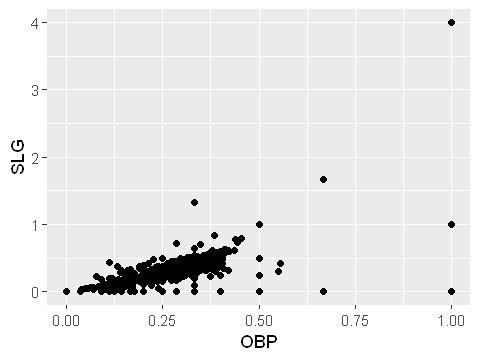

In [6]:
library(repr)
# Change plot size to 4 x 3
    options(repr.plot.width=4, repr.plot.height=3) 

# Scatterplot of SLG vs. OBP
ggplot(mlbBat10, aes(x = OBP, y = SLG)) +
  geom_point()

*Answer*

name,team,position,G,AB,R,H,2B,3B,HR,RBI,TB,BB,SO,SB,CS,OBP,SLG,AVG
B Wood,LAA,3B,81,226,20,33,2,0,4,14,47,6,71,1,0,0.174,0.208,0.146


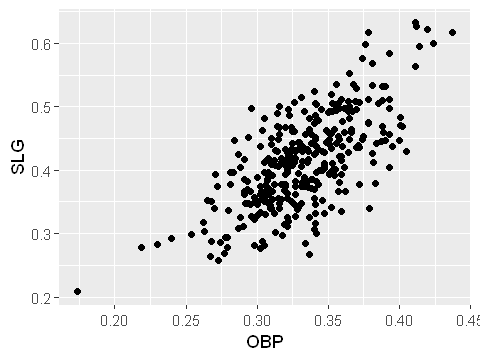

In [7]:
library(repr)
# Change plot size to 4 x 3
    options(repr.plot.width=4, repr.plot.height=3)

# Filter for AB greater than or equal to 200
ab_gt_200 <- mlbBat10 %>%
  filter(AB>= 200) 

# Scatterplot of SLG vs. OBP
ggplot(ab_gt_200, aes(x = OBP, y = SLG)) +
  geom_point()

# Identify the outlying player
ab_gt_200 %>%
  filter(OBP <= .200)

## 2) Correlation
This chapter introduces correlation as a means of quantifying bivariate relationships.

### 2.1) (video) Quantifying the strength of bivariate relationships
he correlation is the way to quantify strength of linear regression, this measure is between -1 to 1, the sign indique us the direction and the magnitud tells us the strength, if our correlation coeficient is :

    near to 1, perfect positive correlation.
    near to .7, we call that kind of correlation strong
    neart to .5, it´s moderate 
    near to .2, it´s weak
    neat to 0, there isn´t correlation

Pearson product-moment correlation

    r(x,y) = Cov(x,y) / sqrt(Sxx * Syy)
    
#### 2.1.3)  Computing correlation
The `cor(x, y)` function will compute the Pearson product-moment correlation between variables, `x` and `y`. Since this quantity is symmetric with respect to `x` and `y`, it doesn't matter in which order you put the variables.

At the same time, the `cor()` function is very conservative when it encounters missing data (e.g. `NA`s). The `use` argument allows you to override the default behavior of returning `NA` whenever any of the values encountered is `NA`. Setting the `use` argument to `"pairwise.complete.obs"` allows `cor()` to compute the correlation coefficient for those observations where the values of x and y are both not missing.

**Exercise**
1. Use cor() to compute the correlation between the birthweight of babies in the ncbirths dataset and their mother's age. There is no missing data in either variable.
2. Compute the correlation between the birthweight and the number of weeks of gestation for all non-missing pairs.

*Answer*

In [8]:
# Compute correlation
ncbirths %>%
  summarize(N = n(), r = cor(weight, mage))

# Compute correlation for all non-missing pairs
ncbirths %>%
  summarize(N = n(), r = cor(weight, weeks, use = "pairwise.complete.obs"))

N,r
1000,0.05506589


N,r
1000,0.6701013


### 2.2 (video) The Anscombe dataset


#### 2.1) Exploring Anscombe
In 1973, Francis Anscombe famously created four datasets with remarkably similar numerical properties, but obviously different graphic relationships. The `Anscombe` dataset contains the `x` and `y `coordinates for these four datasets, along with a grouping variable, `set`, that distinguishes the quartet.

It may be helpful to remind yourself of the graphic relationship by viewing the four scatterplots:


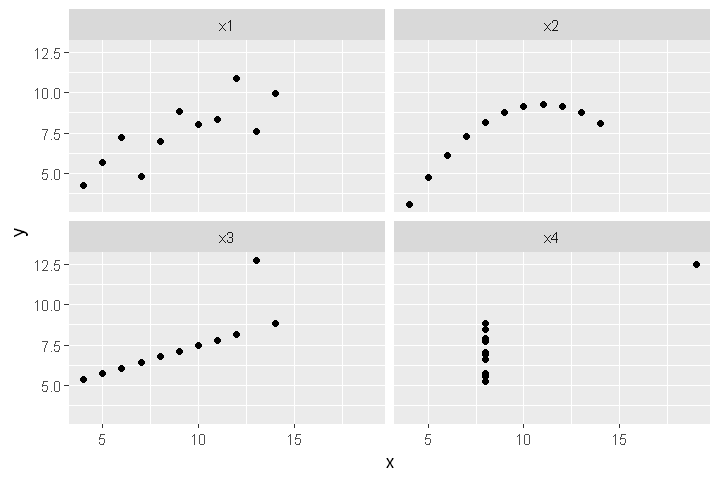

In [9]:
library(repr)
# Change plot size to 4 x 3
    options(repr.plot.width=6, repr.plot.height=4)

ggplot(data = Anscombe, aes(x = x, y = y)) +
  geom_point() +
  facet_wrap(~ set)


**exercise**

For each of the four sets of data points in the Anscombe dataset, compute the following in the order specified. Names are provided in your call to summarize().

    Number of observations, N
    Mean of x
    Standard deviation of x
    Mean of y
    Standard deviation of y
    Correlation coefficient between x and y

*answers*

In [10]:
# Compute properties of Anscombe
Anscombe %>%
  group_by(set) %>%
  summarize(
    N = n(), 
    mean_of_x = mean(x), 
    std_dev_of_x = sd(x), 
    mean_of_y = mean(y), 
    std_dev_of_y = sd(y), 
    correlation_between_x_and_y = cor(x,y)
  )

set,N,mean_of_x,std_dev_of_x,mean_of_y,std_dev_of_y,correlation_between_x_and_y
x1,11,9,3.316625,7.500909,2.031568,0.8164205
x2,11,9,3.316625,7.500909,2.031657,0.8162365
x3,11,9,3.316625,7.500000,2.030424,0.8162867
x4,11,9,3.316625,7.500909,2.030579,0.8165214


**Note** We can see that these 4 sets have the same main measures but at the same time have different graphics

#### 2.1.2) Perception of correlation (2)
Estimating the value of the correlation coefficient between two quantities from their scatterplot can be tricky. Statisticians have shown that people's perception of the strength of these relationships can be influenced by design choices like the x and y scales.

Nevertheless, with some practice your perception of correlation will improve. Toggle through the four scatterplots in the plotting window, each of which you've seen in a previous exercise. Jot down your best estimate of the value of the correlation coefficient between each pair of variables. Then, compare these values to the actual values you compute in this exercise.

If you're having trouble recalling variable names, it may help to preview a dataset in the console with str() or glimpse().

**Exercise**
1. Draw the plot then calculate the correlation between OBP and SLG for all players in the mlbBat10 dataset.
2. Draw the plot then calculate the correlation between OBP and SLG for all players in the mlbBat10 dataset with at least 200 at-bats.
3. Draw the plot then calculate the correlation between height and weight for each sex in the bdims dataset.
4. Draw the plot then calculate the correlation between body weight and brain weight for all species of mammals. Alongside this computation, compute the correlation between the same two quantities after taking their natural logarithms.

*Anwers*

N,r
1199,0.8145628


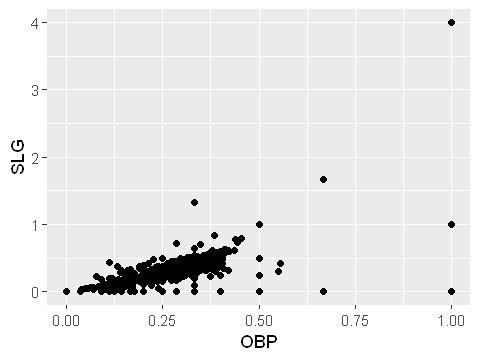

N,r
329,0.6855364


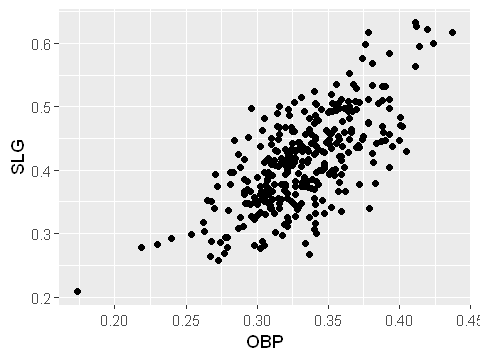

sex,N,r
0,260,0.4310593
1,247,0.5347418


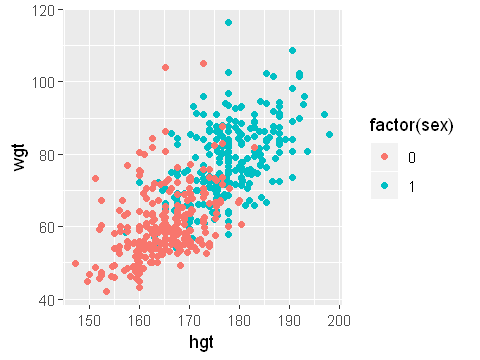

N,r,r_log
62,0.9341638,0.9595748


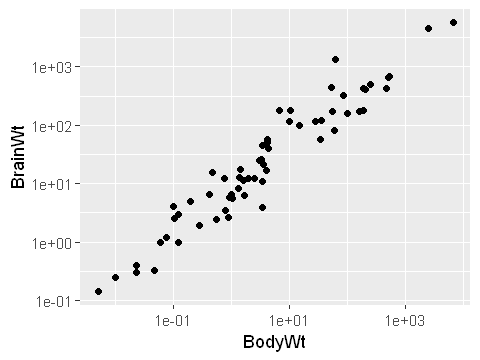

In [11]:
library(repr)
# Change plot size to 4 x 3
    options(repr.plot.width=4, repr.plot.height=3)

# Run this and look at the plot
ggplot(data = mlbBat10, aes(x = OBP, y = SLG)) +
  geom_point()

# Correlation for all baseball players
mlbBat10 %>%
  summarize(N = n(), r = cor(OBP, SLG))



# Run this and look at the plot
mlbBat10 %>% 
    filter(AB > 200) %>%
    ggplot(aes(x = OBP, y = SLG)) + 
    geom_point()

# Correlation for all players with at least 200 ABs
mlbBat10 %>%
  filter(AB >= 200) %>%
  summarize(N = n(), r = cor(OBP, SLG))



# Run this and look at the plot
ggplot(data = bdims, aes(x = hgt, y = wgt, color = factor(sex))) +
  geom_point() 

# Correlation of body dimensions
bdims %>%
  group_by(sex) %>%
  summarize(N = n(), r = cor(hgt, wgt))



# Run this and look at the plot
ggplot(data = mammals, aes(x = BodyWt, y = BrainWt)) +
  geom_point() + scale_x_log10() + scale_y_log10()

# Correlation among mammals, with and without log
mammals %>%
  summarize(N = n(), 
            r = cor(BodyWt, BrainWt), 
            r_log = cor(log(BodyWt), log(BrainWt)))

### 2.3) (video) Interpretation of correlation

### 2.4) (video) Spurious correlation

#### 2.4.1)Spurious correlation in random data
Statisticians must always be skeptical of potentially spurious correlations. Human beings are very good at seeing patterns in data, sometimes when the patterns themselves are actually just random noise. To illustrate how easy it can be to fall into this trap, we will look for patterns in truly random data.

The `noise` dataset contains 20 sets of `x` and `y` variables drawn at random from a standard normal distribution. Each set, denoted as `z`, has 50 observations of `x`, `y` pairs. Do you see any pairs of variables that might be meaningfully correlated? Are all of the correlation coefficients close to zero?

**Exercise**
1. Create a faceted scatterplot that shows the relationship between each of the 20 sets of pairs of random variables x and y. You will need the facet_wrap() function for this.
2. Compute the actual correlation between each of the 20 sets of pairs of x and y.
3. Identify the datasets that show non-trivial correlation of greater than 0.2 in absolute value.

*Answer*

    # Create faceted scatterplot
    ggplot(noise, aes(x = x, y = y)) + geom_point() + facet_wrap(.~z)


    # Compute correlations for each dataset
    noise_summary <- noise %>%
      group_by(z) %>%
      summarize(N = n(), spurious_cor = cor(x, y))

    # Isolate sets with correlations above 0.2 in absolute strength
    noise_summary %>%
      filter(abs(spurious_cor) > .2)
      
## 3) Simple linear regression      
With the notion of correlation under your belt, we'll now turn our attention to simple linear models in this chapter.   

### 3.1) (video) Visualization of linear models

#### 3.1.1) The "best fit" line
The simple linear regression model for a numeric response as a function of a numeric explanatory variable can be visualized on the corresponding scatterplot by a straight line. This is a "best fit" line that cuts through the data in a way that minimizes the distance between the line and the data points.

We might consider linear regression to be a specific example of a larger class of smooth models. The `geom_smooth()` function allows you to draw such models over a scatterplot of the data itself. This technique is known as visualizing the model in the data space. The `method` argument to `geom_smooth()` allows you to specify what class of smooth model you want to see. Since we are exploring linear models, we'll set this argument to the value `"lm"`.

Note that geom_smooth() also takes an `s`e argument that controls the standard error, which we will ignore for now.

**Exercise**   
Create a scatterplot of body weight as a function of height for all individuals in the `bdims` dataset with a simple linear model plotted over the data

*Answer*

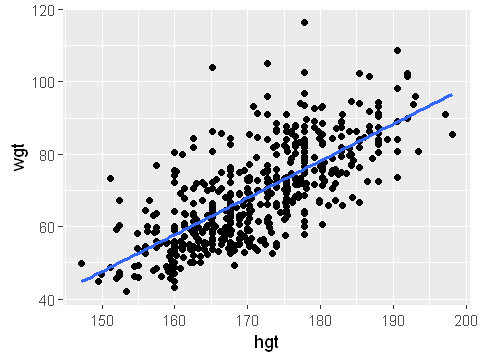

In [12]:
library(repr)
# Change plot size to 4 x 3
    options(repr.plot.width=4, repr.plot.height=3)

# Scatterplot with regression line
ggplot(data = bdims, aes(x = hgt, y = wgt)) + 
  geom_point() + 
  geom_smooth(method = "lm", se = FALSE)


#### 3.1.2) Uniqueness of least squares regression line
The least squares criterion implies that the slope of the regression line is unique. In practice, the slope is computed by R. In this exercise, you will experiment with trying to find the optimal value for the regression slope for weight as a function of height in the `bdims` dataset via trial-and-error.

To help, we've built a custom function for you called `add_line()`, which takes a single argument: the proposed slope coefficient.

**Exercise**
The bdims dataset is available in your workspace. Experiment with different values (to the nearest integer) of the my_slope parameter until you find one that you think fits best.

*Note, It´s necesary to create a function, it´s avalible in your work space. 

*Answer*

In [13]:
add_line<- function (my_slope) {

  bdims_summary <- bdims %>%
    summarize(N = n(), r = cor(hgt, wgt),
              mean_hgt = mean(hgt), mean_wgt = mean(wgt),
              sd_hgt = sd(hgt), sd_wgt = sd(wgt)) %>%
    mutate(true_slope = r * sd_wgt / sd_hgt, 
           true_intercept = mean_wgt - true_slope * mean_hgt)
  p <- ggplot(data = bdims, aes(x = hgt, y = wgt)) + 
    geom_point() + 
    geom_point(data = bdims_summary, 
               aes(x = mean_hgt, y = mean_wgt), 
               color = "red", size = 3)
  
  my_data <- bdims_summary %>%
    mutate(my_slope = my_slope, 
           my_intercept = mean_wgt - my_slope * mean_hgt)
  p + geom_abline(data = my_data, 
                  aes(intercept = my_intercept, slope = my_slope), color = "dodgerblue")
}

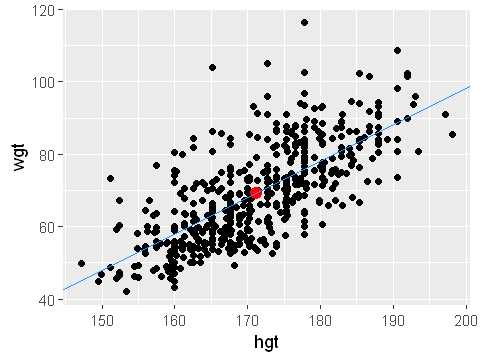

In [14]:
library(repr)
# Change plot size to 4 x 3
    options(repr.plot.width=4, repr.plot.height=3)

# Estimate optimal value of my_slope
add_line(my_slope = 1)

### 3.2) (video) Understanding the linear model
    
    response = fun(explanatory) + noise
    response = intercept + (slope * explanatory) + noise
    Y=β0+β1⋅X+ϵ, where ϵ∼N(0,σϵ).
    

#### 3.2.1) Regression model terminology
Consider a linear regression model of the form:

    Y=β0+β1⋅X+ϵ, where ϵ∼N(0,σϵ).

The slope coefficient is: B1

#### 3.2.2) Fitting a linear model "by hand"
Recall the simple linear regression model:

    Y=b0+b1⋅X

Two facts enable you to compute the slope b1 and intercept b0 of a simple linear regression model from some basic summary statistics.

First, the slope can be defined as:

    b1=rX,Y⋅sYsX

where rX,Y represents the correlation (cor()) of X and Y and sX and sY represent the standard deviation (sd()) of X and Y, respectively.

Second, the point (x¯,y¯) is always on the least squares regression line, where x¯ and y¯ denote the average of x and y, respectively.

The bdims_summary data frame contains all of the information you need to compute the slope and intercept of the least squares regression line for body weight (Y) as a function of height (X). You might need to do some algebra to solve for b0!

    Y =b0 + b1⋅X #solve by b0
    Y - b1⋅X =b0 #so we can use de point (x¯,y¯)

**Exercise**

Print the bdims_summary data frame.
Use mutate() to add the slope and intercept to the bdims_summary data frame.

*Answer*

In [15]:
library(repr)
# Change plot size to 4 x 3
    options(repr.plot.width=4, repr.plot.height=3)

bdims_summary <- bdims %>%
  summarize(N = n(), r = cor(hgt, wgt),
            mean_hgt = mean(hgt), mean_wgt = mean(wgt),
            sd_hgt = sd(hgt), sd_wgt = sd(wgt))

bdims_summary

# Add slope and intercept
bdims_summary %>%
  mutate(slope = r * sd_wgt / sd_hgt, 
         intercept = mean_wgt - slope * mean_hgt)
         

N,r,mean_hgt,mean_wgt,sd_hgt,sd_wgt
507,0.7173011,171.1438,69.14753,9.407205,13.34576


N,r,mean_hgt,mean_wgt,sd_hgt,sd_wgt,slope,intercept
507,0.7173011,171.1438,69.14753,9.407205,13.34576,1.017617,-105.0113


### 3.3) (video) Regression vs. regression to the mean

#### 3.3.1) Regression to the mean
`Regression to the mean` is a concept attributed to Sir Francis Galton. The basic idea is that extreme random observations will tend to be less extreme upon a second trial. This is simply due to chance alone. While "regression to the mean" and "linear regression" are not the same thing, we will examine them together in this exercise.

One way to see the effects of regression to the mean is to compare the heights of parents to their children's heights. While it is true that tall mothers and fathers tend to have tall children, those children tend to be less tall than their parents, relative to average. That is, fathers who are 3 inches taller than the average father tend to have children who may be taller than average, but by less than 3 inches.

The Galton_men and Galton_women datasets contain data originally collected by Galton himself in the 1880s on the heights of men and women, respectively, along with their parents' heights.

Compare the slope of the regression line to the slope of the diagonal line. What does this tell you?

**Exercise**
1. Create a scatterplot of the height of men as a function of their father's height. Add the simple linear regression line and a diagonal line (with slope equal to 1 and intercept equal to 0) to the plot.
2. Create a scatterplot of the height of women as a function of their mother's height. Add the simple linear regression line and a diagonal line to the plot.

*Answer*

    # Height of children vs. height of father
    ggplot(data = Galton_men, aes(x = father, y = height)) +
      geom_point() + 
      geom_abline(slope = 1, intercept = 0) + 
      geom_smooth(method = "lm", se = FALSE)

    # Height of children vs. height of mother
    ggplot(data = Galton_women, aes(x = mother, y = height)) +
      geom_point() + 
      geom_abline(slope = 1, intercept = 0) + 
      geom_smooth(method = "lm", se = FALSE)

## 4) Interpreting regression models
This chapter looks at how to interpret the coefficients in a regression model.

### 4.1) (video) Interpretation of regression coefficients

#### 4.1.1) Fitting simple linear models
While the `geom_smooth(method = "lm")` function is useful for drawing linear models on a scatterplot, it doesn't actually return the characteristics of the model. As suggested by that syntax, however, the function that creates linear models is `lm()`. This function generally takes two arguments:

1. A formula that specifies the model
2. A data argument for the data frame that contains the data you want to use to fit the model

The `lm(`) function return a model object having class `"lm"`. This object contains lots of information about your regression model, including the data used to fit the model, the specification of the model, the fitted values and residuals, etc.


**Exercise**
1. Using the bdims dataset, create a linear model for the weight of people as a function of their height.
2. Using the mlbBat10 dataset, create a linear model for SLG as a function of OBP.
2. Using the mammals dataset, create a linear model for the body weight of mammals as a function of their brain weight, after taking the natural log of both variables.

*Answer*

In [16]:
# Linear model for weight as a function of height
lm(wgt ~ hgt, data = bdims)

# Linear model for SLG as a function of OBP
lm(SLG~OBP, data = mlbBat10)

# Log-linear model for body weight as a function of brain weight
lm(log(BodyWt)~log(BrainWt), data = mammals)


Call:
lm(formula = wgt ~ hgt, data = bdims)

Coefficients:
(Intercept)          hgt  
   -105.011        1.018  



Call:
lm(formula = SLG ~ OBP, data = mlbBat10)

Coefficients:
(Intercept)          OBP  
   0.009407     1.110323  



Call:
lm(formula = log(BodyWt) ~ log(BrainWt), data = mammals)

Coefficients:
 (Intercept)  log(BrainWt)  
      -2.509         1.225  


### 4.2 (video) Your linear model object
in the previous module you can saw `"lm"` function, but know that if you create a variable that containt this kind object you will obtain a `"lm"` object, it´s not a dataframe, it´s not a list or vector, so you can access to some functions like `summary`,`coef`,`fitted.values` and `residuals` function.

#### 4.2.1) The lm summary output
An `"lm"` object contains a host of information about the regression model that you fit. There are various ways of extracting different pieces of information.

The `coef()` function displays only the values of the coefficients. Conversely, the `summary()` function displays not only that information, but a bunch of other information, including the associated standard error and p-value for each coefficient, the `R2`, adjusted `R2`, and the residual standard error. The summary of an `"lm"` object in R is very similar to the output you would see in other statistical computing environments (e.g. Stata, SPSS, etc.)


**Exercise**
We have already created the mod object, a linear model for the weight of individuals as a function of their height, using the bdims dataset and the code

    mod <- lm(wgt ~ hgt, data = bdims)

Now, you will:

1. Use coef() to display the coefficients of mod.
2. Use summary() to display the full regression output of mod

*Answer*

In [17]:
 mod <- lm(wgt ~ hgt, data = bdims)

# Show the coefficients
coef(mod)

# Show the full output
summary(mod)

(Intercept)         hgt 
-105.011254    1.017617


Call:
lm(formula = wgt ~ hgt, data = bdims)

Residuals:
    Min      1Q  Median      3Q     Max 
-18.743  -6.402  -1.231   5.059  41.103 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -105.01125    7.53941  -13.93   <2e-16 ***
hgt            1.01762    0.04399   23.14   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 9.308 on 505 degrees of freedom
Multiple R-squared:  0.5145,	Adjusted R-squared:  0.5136 
F-statistic: 535.2 on 1 and 505 DF,  p-value: < 2.2e-16


#### 4.2.2) Fitted values and residuals
Once you have fit a regression model, you are often interested in the fitted values (`y^i`) and the residuals (ei), where i indexes the observations. Recall that:

    ei=yi−y^i #note y^i it´s a parameter like y_hat, but we don´t know how can write it´s in jupyter
    
The least squares fitting procedure guarantees that the mean of the residuals is zero (n.b., numerical instability may result in the computed values not being exactly zero). At the same time, the mean of the fitted values must equal the mean of the response variable.

In this exercise, we will confirm these two mathematical facts by accessing the fitted values and residuals with the `fitted.values()` and `residuals()` functions, respectively, for the following model:

    mod <- lm(wgt ~ hgt, data = bdims)
    
**Exercise**
mod (defined above) is available in your workspace.

1. Confirm that the mean of the body weights equals the mean of the fitted values of mod.
2. Compute the mean of the residuals of mod.

*Answer*

In [18]:
# Mean of weights equal to mean of fitted values?
mean(bdims$wgt) == mean(fitted.values(mod))

# Mean of the residuals
mean(residuals(mod))

[1] TRUE

[1] -3.265933e-16

#### 4.2.3) Tidying your linear model
As you fit a regression model, there are some quantities (e.g. R2) that apply to the model as a whole, while others apply to each observation (e.g. y^i). If there are several of these per-observation quantities, it is sometimes convenient to attach them to the original data as new variables.

The `augment()` function from the `broom` package does exactly this. It takes a model object as an argument and returns a data frame that contains the data on which the model was fit, along with several quantities specific to the regression model, including the fitted values, residuals, leverage scores, and standardized residuals.


**Exercise**
The same linear model from the last exercise, mod, is available in your workspace.

1. Load the broom package.
2. Create a new data frame called bdims_tidy that is the augmentation of the mod linear model.
3. View the bdims_tidy data frame using glimpse()

*Answer*

In [19]:
# Load broom
library("broom")

# Create bdims_tidy
bdims_tidy<-augment(mod)

# Glimpse the resulting data frame
glimpse(bdims_tidy)

Observations: 507
Variables: 9
$ wgt        <dbl> 65.6, 71.8, 80.7, 72.6, 78.8, 74.8, 86.4, 78.4, 62.0, 81...
$ hgt        <dbl> 174.0, 175.3, 193.5, 186.5, 187.2, 181.5, 184.0, 184.5, ...
$ .fitted    <dbl> 72.05406, 73.37697, 91.89759, 84.77427, 85.48661, 79.686...
$ .se.fit    <dbl> 0.4320546, 0.4520060, 1.0667332, 0.7919264, 0.8183471, 0...
$ .resid     <dbl> -6.4540648, -1.5769666, -11.1975919, -12.1742745, -6.686...
$ .hat       <dbl> 0.002154570, 0.002358152, 0.013133942, 0.007238576, 0.00...
$ .sigma     <dbl> 9.312824, 9.317005, 9.303732, 9.301360, 9.312471, 9.3147...
$ .cooksd    <dbl> 5.201807e-04, 3.400330e-05, 9.758463e-03, 6.282074e-03, ...
$ .std.resid <dbl> -0.69413418, -0.16961994, -1.21098084, -1.31269063, -0.7...


### 4.3) (video) Using your linear model

#### 4.3.1) Making predictions
The `fitted.values()` function or the `augment()`-ed data frame provides us with the fitted values for the observations that were in the original data. However, once we have fit the model, we may want to compute expected values for observations that were **not** present in the data on which the model was fit. These types of predictions are called out-of-sample.

The `ben` data frame contains a height and weight observation for one person. The `mod` object contains the fitted model for weight as a function of height for the observations in the `bdims` dataset. We can use the `predict()` function to generate expected values for the weight of new individuals. We must pass the data frame of new observations through the `newdata` argument.

**Exercise**
The same linear model, mod, is defined in your workspace.

1. Print ben to the console.
2. Use predict() with the newdata argument to compute the expected height of the individual in the ben data frame.

*Answer*

In [20]:

ben<-data.frame(wgt = 74.8, hgt = 182.8)
mod <- lm(wgt ~ hgt, data = bdims)

# Print ben
ben

# Predict the weight of ben
predict(mod, newdata = ben)

wgt,hgt
74.8,182.8


1 
81.00909

#### 4.3.2) Adding a regression line to a plot manually
The `geom_smooth()` function makes it easy to add a simple linear regression line to a scatterplot of the corresponding variables. And in fact, there are more complicated regression models that can be visualized in the data space with `geom_smooth()`. However, there may still be times when we will want to add regression lines to our scatterplot manually. To do this, we will use the `geom_abline()` function, which takes `slope` and `intercept` arguments. Naturally, we have to compute those values ahead of time, but we already saw how to do this (e.g. using `coef()`).

The `coefs` data frame contains the model estimates retrieved from `coef()`. Passing this to `geom_abline()` as the data argument will enable you to draw a straight line on your scatterplot

**Exercise**
Use geom_abline() to add a line defined in the coefs data frame to a scatterplot of weight vs. height for individuals in the bdims dataset.

*Answer*
    
    #note i can´t recreate this exercise because my variable coefs is not a data frame
    # Add the line to the scatterplot
    ggplot(data = bdims, aes(x = hgt, y = wgt)) + 
      geom_point() + 
      geom_abline(data = coefs, 
                  aes(intercept = `(Intercept)`, slope = hgt),  
                  color = "dodgerblue")


## 4) Model Fit
In this final chapter, you'll learn how to assess the "fit" of a simple linear regression model.

### 4.1) (video) Assessing model fit
SSE: sum square error = Sum(error^2)
RMSE, basically it´s standard deviation of residuals = sqrt(SSE/degree of freedom) 

#### Standard error of residuals
One way to assess strength of fit is to consider how far off the model is for a typical case. That is, for some observations, the fitted value will be very close to the actual value, while for others it will not. The magnitude of a typical residual can give us a sense of generally how close our estimates are.

However, recall that some of the residuals are positive, while others are negative. In fact, it is guaranteed by the least squares fitting procedure that the mean of the residuals is zero. Thus, it makes more sense to compute the square root of the mean squared residual, or root mean squared error (RMSE). R calls this quantity the residual standard error.

To make this estimate unbiased, you have to divide the sum of the squared residuals by the degrees of freedom in the model. Thus,

    RMSE= sqrt(SSE/degree of freedom) = sqrt(Sum(error^2)/degree of freedom)

You can recover the residuals from mod with `residuals()`, and the degrees of freedom with `df.residual()`.

**Exercise**
1. View a summary() of mod.
2. Compute the mean of the residuals() and verify that it is approximately zero.
3. Use residuals() and df.residual() to compute the root mean squared error (RMSE), a.k.a. residual standard error.

*Answer*


In [21]:
# View summary of model
summary(mod)

# Compute the mean of the residuals
mean(residuals(mod))

# Compute RMSE
sqrt(sum(residuals(mod)^2) / df.residual(mod))


Call:
lm(formula = wgt ~ hgt, data = bdims)

Residuals:
    Min      1Q  Median      3Q     Max 
-18.743  -6.402  -1.231   5.059  41.103 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -105.01125    7.53941  -13.93   <2e-16 ***
hgt            1.01762    0.04399   23.14   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 9.308 on 505 degrees of freedom
Multiple R-squared:  0.5145,	Adjusted R-squared:  0.5136 
F-statistic: 535.2 on 1 and 505 DF,  p-value: < 2.2e-16


[1] -3.265933e-16

[1] 9.30804

### 4.2) (video) Comparing model fits
in the previous chapter you saw how can use SSE to interpreted how well can fit the model to our data, but if we want to compare this measure through different types of model, we need a benchmark

a sensible choise would be average of all lenghts and in fact if you have to make the same prediction for all measures the average it´s the best number that you can pick, we can think our model like y_hat = y bar (average of y) this model it´s called null model  or null (average) model, we can do this model in R using lm in our model and 1 as responde variable  (e.g lm(y~1, data = d.f ) ) and compare its SST (sum e ^2)  versus our SSE that we obtain in our model and the ration beetwen our SSE and SST it´s a quantification of variability explains by our model.

    (coefficiente of determination) R^2= 1- SSE/SST = 1 - Var(e)/Var(y)

#### 4.2.1) Assessing simple linear model fit
Recall that the coefficient of determination (R^2), can be computed as

    R^2=1−SSE/SST =1 − Var(e)/Var(y),
    
where `e` is the vector of residuals and `y` is the response variable. This gives us the interpretation of `R^2` as the percentage of the variability in the response that is explained by the model, since the residuals are the part of that variability that remains unexplained by the model.

**Exercise**
The bdims_tidy data frame is the result of augment()-ing the bdims data frame with the mod for wgt as a function of hgt.

1. Use the summary() function to view the full results of mod.
2. Use the bdims_tidy data frame to compute the R^2 of mod manually using the formula above, by computing the ratio of the variance of the residuals to the variance of the response variable.

*Answer*


In [22]:
# View model summary
summary(mod)

# Compute R-squared
bdims_tidy %>%
  summarize(var_y = var(wgt), var_e = var(.resid)) %>%
  mutate(R_squared = 1 - var_e / var_y)


Call:
lm(formula = wgt ~ hgt, data = bdims)

Residuals:
    Min      1Q  Median      3Q     Max 
-18.743  -6.402  -1.231   5.059  41.103 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -105.01125    7.53941  -13.93   <2e-16 ***
hgt            1.01762    0.04399   23.14   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 9.308 on 505 degrees of freedom
Multiple R-squared:  0.5145,	Adjusted R-squared:  0.5136 
F-statistic: 535.2 on 1 and 505 DF,  p-value: < 2.2e-16


var_y,var_e,R_squared
178.1094,86.46839,0.5145208


#### 4.2.2) Linear vs. average
The R^2 gives us a numerical measurement of the strength of fit relative to a null model based on the average of the response variable

    y_hat null = y_avg
    
This model has an R^2 of zero because SSE=SST. That is, since the fitted values (y_hat null) are all equal to the average (y¯), the residual for each observation is the distance between that observation and the mean of the response. Since we can always fit the null model, it serves as a baseline against which all other models will be compared.    

In the graphic, we visualize the residuals for the null model (`mod_null` at left) vs. the simple linear regression model (`mod_hgt` at right) with height as a single explanatory variable. Try to convince yourself that, if you squared the lengths of the grey arrows on the left and summed them up, you would get a larger value than if you performed the same operation on the grey arrows on the right.

It may be useful to preview these `augment()`-ed data frames with `glimpse()`:

    glimpse(mod_null)
    glimpse(mod_hgt)
  

**Exercise**
1. Compute the sum of the squared residuals (SSE) for the null model mod_null.
2. Compute the sum of the squared residuals (SSE) for the regression model mod_hgt.

*Answer*

    # Compute SSE for null model
    mod_null %>%
      summarize(SSE = var(.resid))

    # Compute SSE for regression model
    mod_hgt %>%
      summarize(SSE = var(.resid))      

### 4.3) (video) Unusual points

#### 4.3.1) Leverage
The leverage of an observation in a regression model is defined entirely in terms of the distance of that observation from the mean of the explanatory variable. That is, observations close to the mean of the explanatory variable have low leverage, while observations far from the mean of the explanatory variable have high leverage. Points of high leverage may or may not be influential.

The augment() function from the broom package will add the leverage scores (.hat) to a model data frame.

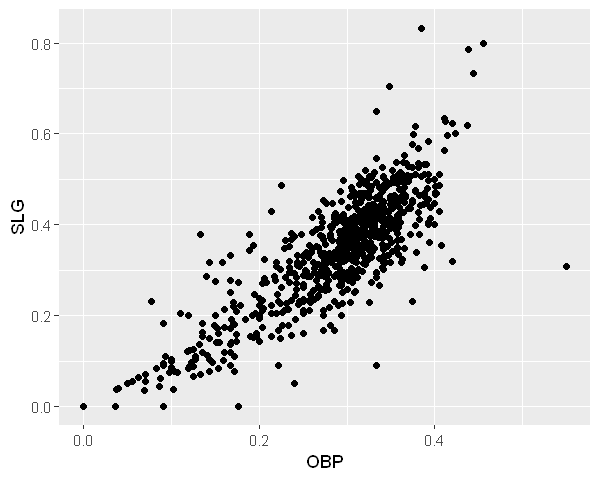

In [23]:
library(repr)
# Change plot size to 4 x 3
    options(repr.plot.width=5, repr.plot.height=4)

mod<- lm(SLG~OBP, data = filter(mlbBat10, AB>=10))
ggplot(filter(mlbBat10, AB>=10), aes(x =OBP, y =SLG)) + geom_point()


**Exercise**
Use augment() to list the top 6 observations by their leverage scores, in descending order.

*Answer*

In [24]:
# Rank points of high leverage
mod %>%
  augment() %>%
  arrange(desc(.hat)) %>%
  head()

SLG,OBP,.fitted,.se.fit,.resid,.hat,.sigma,.cooksd,.std.resid
0.000,0.000,-0.03744579,0.009956861,0.03744579,0.01939493,0.07153050,0.0027664282,0.5289049
0.000,0.000,-0.03744579,0.009956861,0.03744579,0.01939493,0.07153050,0.0027664282,0.5289049
0.000,0.000,-0.03744579,0.009956861,0.03744579,0.01939493,0.07153050,0.0027664282,0.5289049
0.308,0.550,0.69049108,0.009158810,-0.38249108,0.01641049,0.07011360,0.2427446800,-5.3943121
0.000,0.037,0.01152451,0.008770891,-0.01152451,0.01504981,0.07154283,0.0002015398,-0.1624191
0.038,0.038,0.01284803,0.008739031,0.02515197,0.01494067,0.07153800,0.0009528017,0.3544561


### 4.3.2) Influence
As noted previously, observations of high leverage may or may not be `influential`. The influence of an observation depends not only on its leverage, but also on the magnitude of its residual. Recall that while leverage only takes into account the explanatory variable (x), the residual depends on the response variable (y) and the fitted value (y^).

Influential points are likely to have high leverage and deviate from the general relationship between the two variables. We measure influence using Cook's distance, which incorporates both the leverage and residual of each observation.

**Exercise**
Use augment() to list the top 6 observations by their Cook's distance (.cooksd), in descending order.

*Answer*

In [25]:
mod %>%
  augment() %>%
  arrange(desc(.cooksd)) %>%
  head()

SLG,OBP,.fitted,.se.fit,.resid,.hat,.sigma,.cooksd,.std.resid
0.308,0.550,0.69049108,0.009158810,-0.3824911,0.016410487,0.07011360,0.24274468,-5.394312
0.833,0.385,0.47211002,0.004190644,0.3608900,0.003435619,0.07028875,0.04407145,5.056428
0.800,0.455,0.56475653,0.006186785,0.2352435,0.007488132,0.07101125,0.04114818,3.302718
0.379,0.133,0.13858258,0.005792344,0.2404174,0.006563752,0.07098798,0.03760256,3.373787
0.786,0.438,0.54225666,0.005678026,0.2437433,0.006307223,0.07097257,0.03712042,3.420018
0.231,0.077,0.06446537,0.007506974,0.1665346,0.011024863,0.07127661,0.03057912,2.342252


### 4.4) (video) Dealing with unusual points

#### 4.4.1) Removing outliers
Observations can be outliers for a number of different reasons. Statisticians must always be careful—and more importantly, transparent—when dealing with outliers. Sometimes, a better model fit can be achieved by simply removing outliers and re-fitting the model. However, one must have strong justification for doing this. A desire to have a higher R^2 is not a good enough reason!

In the mlbBat10 data, the outlier with an OBP of 0.550 is Bobby Scales, an infielder who had four hits in 13 at-bats for the Chicago Cubs. Scales also walked seven times, resulting in his unusually high OBP. The justification for removing Scales here is weak. While his performance was unusual, there is nothing to suggest that it is not a valid data point, nor is there a good reason to think that somehow we will learn more about Major League Baseball players by excluding him.

Nevertheless, we can demonstrate how removing him will affect our model.

**Exercise**
1. Use filter() to create a subset of mlbBat10 called nontrivial_players consisting of only those players with at least 10 at-bats and OBP of below 0.500.
2. Fit the linear model for SLG as a function of OBP for the nontrivial_players. Save the result as mod_cleaner.
3. View the summary() of the new model and compare the slope and R2 to those of mod, the original model fit to the data on all players.
4. Visualize the new model with ggplot() and the appropriate geom_*() functions.

*Answer*


Call:
lm(formula = SLG ~ OBP, data = nontrivial_players)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.31383 -0.04165 -0.00261  0.03992  0.35819 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.043326   0.009823  -4.411 1.18e-05 ***
OBP          1.345816   0.033012  40.768  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.07011 on 734 degrees of freedom
Multiple R-squared:  0.6937,	Adjusted R-squared:  0.6932 
F-statistic:  1662 on 1 and 734 DF,  p-value: < 2.2e-16


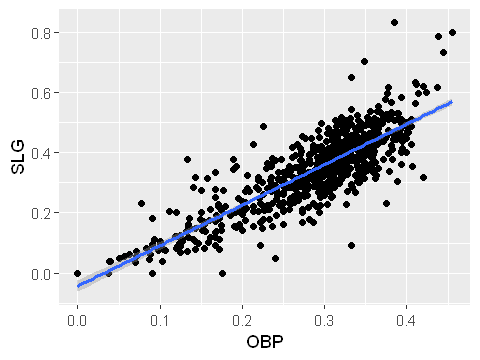

In [26]:
library(repr)
# Change plot size to 4 x 3
    options(repr.plot.width=4, repr.plot.height=3)

# Create nontrivial_players
nontrivial_players<-filter(mlbBat10, AB>=10 & OBP < .500)

# Fit model to new data
mod_cleaner<-lm(SLG ~ OBP, data = nontrivial_players)

# View model summary
summary(mod_cleaner)

# Visualize new model
ggplot(nontrivial_players, aes(x = OBP, y = SLG)) + 
geom_point() + 
geom_smooth(method = "lm")

#### 4.4.2) High leverage points
Not all points of high leverage are influential. While the high leverage observation corresponding to Bobby Scales in the previous exercise is influential, the three observations for players with OBP and SLG values of 0 are not influential.

This is because they happen to lie right near the regression anyway. Thus, while their extremely low OBP gives them the power to exert influence over the slope of the regression line, their low SLG prevents them from using it.

**Exercise**
The linear model, mod, is available in your workspace. Use a combination of augment(), arrange() with two arguments, and head() to find the top 6 observations with the highest leverage but the lowest Cook's distance

*Answer*

In [27]:
# Rank high leverage points
mod %>%
 augment() %>%
 arrange(desc(.hat),.cooksd) %>%
 head()

SLG,OBP,.fitted,.se.fit,.resid,.hat,.sigma,.cooksd,.std.resid
0.000,0.000,-0.03744579,0.009956861,0.03744579,0.01939493,0.07153050,0.0027664282,0.5289049
0.000,0.000,-0.03744579,0.009956861,0.03744579,0.01939493,0.07153050,0.0027664282,0.5289049
0.000,0.000,-0.03744579,0.009956861,0.03744579,0.01939493,0.07153050,0.0027664282,0.5289049
0.308,0.550,0.69049108,0.009158810,-0.38249108,0.01641049,0.07011360,0.2427446800,-5.3943121
0.000,0.037,0.01152451,0.008770891,-0.01152451,0.01504981,0.07154283,0.0002015398,-0.1624191
0.038,0.038,0.01284803,0.008739031,0.02515197,0.01494067,0.07153800,0.0009528017,0.3544561


**Exercise**

*Answer*

In [28]:
library(repr)
# Change plot size to 4 x 3
    options(repr.plot.width=4, repr.plot.height=3)